In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv("HousingData.csv")

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [10]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
x=data.drop('MEDV',axis=1)


In [20]:
y=data['MEDV']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:

scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [28]:
print("shape of scaled x train:",x_train.shape)
print("shape of scaled x test:",x_test.shape)

shape of scaled x train: (315, 13)
shape of scaled x test: (79, 13)


In [29]:
x_train[0]

array([ 0.69635595, -0.47901924,  1.00093935, -0.25335585,  1.68816923,
        0.25832713,  0.91959478, -0.85032271,  1.6641432 ,  1.50643985,
        0.75190813, -3.35027995,  1.59933497])

In [31]:
x_train[0].shape

(13,)

In [43]:
#model

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import *

def house_price_prediction():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(x_train[0].shape)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss='mse', metrics=['mse'])
    return model

In [45]:
model= house_price_prediction()
history = model.fit(x=x_train,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100


315/315 [==============================] - 7s 8ms/step - loss: 113.8153 - mse: 113.8153 - val_loss: 21.4047 - val_mse: 21.4047
Epoch 2/100
315/315 [==============================] - 2s 6ms/step - loss: 20.2751 - mse: 20.2751 - val_loss: 13.1461 - val_mse: 13.1461
Epoch 3/100
315/315 [==============================] - 2s 6ms/step - loss: 17.1329 - mse: 17.1329 - val_loss: 12.7799 - val_mse: 12.7799
Epoch 4/100
315/315 [==============================] - 2s 6ms/step - loss: 14.6385 - mse: 14.6385 - val_loss: 19.5257 - val_mse: 19.5257
Epoch 5/100
315/315 [==============================] - 2s 6ms/step - loss: 13.0157 - mse: 13.0157 - val_loss: 14.0256 - val_mse: 14.0256
Epoch 6/100
315/315 [==============================] - 2s 6ms/step - loss: 11.3804 - mse: 11.3804 - val_loss: 10.6065 - val_mse: 10.6065
Epoch 7/100
315/315 [==============================] - 2s 5ms/step - loss: 10.7528 - mse: 10.7528 - val_loss: 10.6453 - val_mse: 10.6453
Epoch 8/100
315/315 [================

Epoch 58/100
315/315 [==============================] - 2s 6ms/step - loss: 3.8626 - mse: 3.8626 - val_loss: 10.6437 - val_mse: 10.6437
Epoch 59/100
315/315 [==============================] - 2s 6ms/step - loss: 2.9690 - mse: 2.9690 - val_loss: 26.1136 - val_mse: 26.1136
Epoch 60/100
315/315 [==============================] - 2s 6ms/step - loss: 2.7163 - mse: 2.7163 - val_loss: 11.5013 - val_mse: 11.5013
Epoch 61/100
315/315 [==============================] - 2s 6ms/step - loss: 2.7499 - mse: 2.7499 - val_loss: 8.6615 - val_mse: 8.6615
Epoch 62/100
315/315 [==============================] - 2s 6ms/step - loss: 2.7008 - mse: 2.7008 - val_loss: 8.4763 - val_mse: 8.4763
Epoch 63/100
315/315 [==============================] - 2s 6ms/step - loss: 2.4575 - mse: 2.4575 - val_loss: 9.7145 - val_mse: 9.7145
Epoch 64/100
315/315 [==============================] - 2s 6ms/step - loss: 2.7869 - mse: 2.7869 - val_loss: 9.3513 - val_mse: 9.3513
Epoch 65/100
315/315 [==============================] - 

In [46]:
test_input = [[0.00154995, 0.        , 0.28962963, 0.        , 0.27777778,
       0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542 ,
       0.88297872, 0.99665297, 0.16851064]]
print("actual output:",24.0)
print("predicted output:",model.predict(test_input))

actual output: 24.0
1/1 [==============================] - 0s 463ms/step
predicted output: [[15.4272175]]


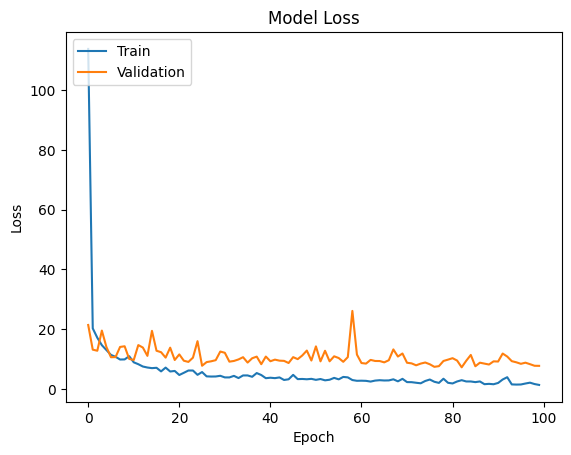

In [47]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [49]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

3/3 [==============================] - 1s 4ms/step - loss: 7.7227 - mse: 7.7227
Mean squared error on test data:  7.722715854644775
Mean absolute error on test data:  7.722715854644775
